# Creating Bayesian networks on a subset of the variables

In this notebook we give an easy method for finding the optimal BN for a subset of the BN variables. First we create a Gobnilp object and read in some data:

In [1]:
from pygobnilp.gobnilp import Gobnilp
m = Gobnilp()
m.learn('discrete.dat',end='data')

Using license file /home/james/gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter PreCrush to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter CutPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter GomoryPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter ZeroHalfCuts to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPGapAbs to 0.0
   Prev: 1e-10  Min: 0.0  Max: inf  Default: 1e-10


We can use the `bn_variables` property to get a list of the variables in this data. Normally a BN would be learned for all these variables.

In [2]:
m.bn_variables

['A', 'B', 'C', 'D', 'E', 'F']

To restrict attention to just the variables B, C, D and F, we just use the `set_bn_variables` method:

In [3]:
m.set_bn_variables('BCDF')
m.bn_variables

['B', 'C', 'D', 'F']

Since the data has already been read in we use the `learn` without supplying a data source and start the learning process from the 'data' stage.

**********
BN has score -16917.208027209443
**********
B<- -4841.285573475907
C<- -3501.5105385969146
D<-B,C -5104.223974458091
F<- -3470.18794067853
**********
bnlearn modelstring = 
[B][C][D|B:C][F]
**********
CPDAG:
Vertices: B,C,D,F
B->D
C->D



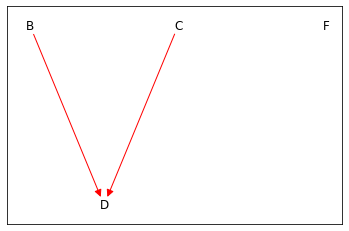

In [4]:
m.learn(start='data')

It is interesting to compare this network to that learned from the entire set of variables (when there is no restricton on parent set size).

**********
BN has score -24028.0947783535
**********
A<- -5502.137377150637
B<-A -3688.9395212202216
C<- -3501.5105385969146
D<-A,C -3555.014444236549
E<-B,F -4310.304956470649
F<- -3470.18794067853
**********
bnlearn modelstring = 
[A][B|A][C][D|A:C][E|B:F][F]
**********
CPDAG:
Vertices: A,B,C,D,E,F
A-B
A->D
B->E
C->D
F->E



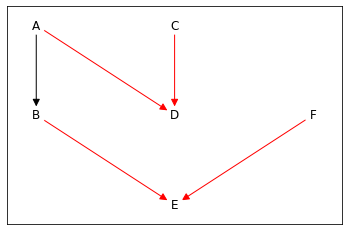

In [5]:
m.set_bn_variables('ABCDEF')
m.learn(start='data',palim=None) # no restricton on parent set size

We get the same conditional independence relations for B, C, D and F in both graphs.